In [1]:
#TEST

In [2]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate
import figure 
from EconModel import cpptools
import pickle

from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings

do_compile = True
threads = 20
T = 20


In [3]:
name = 'model_FC'
model_name = "model_FC"
do_distr_yerror = "none"

do_distr_yerror = "norm"
do_yerror = 1
name_error = f'{do_distr_yerror}{do_yerror}std_Yerror'
N = 10000
#name_error = "uni2std_Yerror"

specs = {}
#specs.update({f'test2':{'latexname':'limited', 'par':{ 'T':T, 'num_K': 5, 'num_A': 10 ,  'do_HK': False, 'threads':threads,'bargaining':0}}})


#specs.update({f'model_LC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})
#specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':2}}})
specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': False, 'simN': N,  'threads':threads,'bargaining':0}}})

# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    
    # setup model
    model = LimitedCommitmentModelClass(name=name,par=spec['par'])
    model.spec = spec

    compile_now = True if do_compile & (m==0) else False
    model.link_to_cpp(force_compile=compile_now)
    

# setup model
#model = LimitedCommitmentModelClass(name=name)    
#model.link_to_cpp(force_compile=True)


#load par and sol
pickle_file = f'output/{name}_sol.pickle'

with open(pickle_file, 'rb') as f:
    model.sol = pickle.load(f)

pickle_file = f'output/{name}_par.pickle'

with open(pickle_file, 'rb') as f:
    model.par = pickle.load(f)
    model.par.simN = N

In [4]:
data = Estimate.create_data(model,start_p = 2, end_p = model.par.T-2, yerror = do_distr_yerror, scale_st = do_yerror )
data = Estimate.create_variable(data, model.par)
data = Estimate.aux_est(data,model.par)

_, wald_FC_w , wald_NC_w, wald_FC_noW_w,  wald_NC_noW_w, _ = Estimate.main_est(data,gender= "w", do_estimate_wage = "est_omega", print_reg = True, shadow_value_simple=3, do_control_love = False)
            

c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:194: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log_l] = data[log_name_l]-data[log_name_l2]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:195: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log_l2] = data[log_name_l2]-data[log_name_l3]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:193: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

                            OLS Regression Results                            
Dep. Variable:                    y_w   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                 5.548e+05
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        14:26:19   Log-Likelihood:                 3248.9
No. Observations:                4512   AIC:                            -4856.
Df Residuals:                    3691   BIC:                             410.5
Df Model:                         820                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.52

In [5]:
#SUMMARIZE!! TORSDAG!!  N = 5000, FC , nn = 2961, 10000 = 5640  NC = nn =9136 , LC 100067
data2 = Estimate.create_data(model,start_p = 2, end_p = model.par.T-2, yerror = do_distr_yerror, scale_st = do_yerror )
data2 = Estimate.create_variable(data2, model.par)
data2['BMI_w']=data2['BMI_w']-1
data2['BMI_m']=data2['BMI_m']-1
summary = data2[['hours_w','hours_m','cons','wage_w','wage_m','earnings_w','earnings_m','wealth','BMI_w','BMI_m','barganing']].describe()
summary_by_T = data2[['hours_w','hours_m','cons','wage_w','wage_m','earnings_w','earnings_m','wealth','BMI_w','BMI_m','barganing','t']].groupby('t').mean()
summary_by_T['div_share'] = 1-data2[['hours_w','t']].groupby('t').count()/10000

print(summary)
print(summary_by_T)

#print(summary_by_count)

           hours_w      hours_m         cons       wage_w       wage_m  \
count  6959.000000  6959.000000  6959.000000  6959.000000  6959.000000   
mean      0.823985     0.821727     1.477444     1.513604     1.513130   
std       0.138907     0.138222     0.184015     0.091614     0.091131   
min       0.268048     0.197155     0.923122     1.233628     1.235849   
25%       0.735096     0.732843     1.344978     1.449083     1.448779   
50%       0.841368     0.838632     1.508781     1.509473     1.508687   
75%       0.938661     0.934592     1.616970     1.573293     1.573451   
max       1.000000     1.000000     2.097756     1.887074     1.859805   

        earnings_w   earnings_m       wealth        BMI_w        BMI_m  \
count  6959.000000  6959.000000  6959.000000  6959.000000  6959.000000   
mean      1.258448     1.254906     3.924764     0.236241     0.256790   
std       0.200875     0.200008     1.136025     0.424802     0.436894   
min       0.540491     0.556243     1

c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:194: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log_l] = data[log_name_l]-data[log_name_l2]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:195: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log_l2] = data[log_name_l2]-data[log_name_l3]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:193: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

In [6]:
stop

import statsmodels.api as sm

def main_est(data, gender = "w", do_estimate_wage = "est_omega", print_reg = False, shadow_value_simple = 1, do_control_love = False):
    #TODO tillad for at man kun tester på baggrund af en time varying distributinal faktor

    #Find the gender and the gender of the spouse
    if gender == "w":
        spouse = "m"
    elif gender =='m':
        spouse = "w"
    else: 
        raise Exception("Gender must be m or w")

    #Find time varying distirbutional facto
    if do_estimate_wage == "est_omega":
        data['wage_shock']=data[f'omega_res_{gender}']
        data['wage_shock_l']=data[f'omega_res_{gender}_l']
        data['wage_shock_l2']=data[f'omega_res_{gender}_l2']
        data['wage_shock_j']=data[f'omega_res_{spouse}']
        data['wage_shock_j_l']=data[f'omega_res_{spouse}_l']
        data['wage_shock_j_l2']=data[f'omega_res_{spouse}_l2']
    elif do_estimate_wage == "true_omega":
        data['wage_shock']=data[f'delta_omega_{gender}']
        data['wage_shock_l']=data[f'delta_omega_{gender}_l']
        data['wage_shock_l2']=data[f'delta_omega_{gender}_l2']
        data['wage_shock_j']=data[f'delta_omega_{spouse}']
        data['wage_shock_j_l']=data[f'delta_omega_{spouse}_l']
        data['wage_shock_j_l2']=data[f'delta_omega_{spouse}_l2']
    elif do_estimate_wage == "wage":
        data['wage_shock']=data[f'delta_log_wage_{gender}']
        data['wage_shock_l']=data[f'delta_log_wage_{gender}_l']
        data['wage_shock_l2']=data[f'delta_log_wage_{gender}_l2']
        data['wage_shock_j']=data[f'delta_log_wage_{spouse}']
        data['wage_shock_j_l']=data[f'delta_log_wage_{spouse}_l']
        data['wage_shock_j_l2']=data[f'delta_log_wage_{spouse}_l2']
    else: 
        raise Exception("do_estimate_wage must be est_omega, true_omega, wage")

  
    data['BMI'] = data[f'delta_log_BMI_{gender}']
    data['BMI_l'] = data[f'delta_log_BMI_{gender}_l']
    data['BMI_l2'] = data[f'delta_log_BMI_{gender}_l2']
    data['BMI_j'] = data[f'delta_log_BMI_{spouse}']
    data['BMI_j_l'] = data[f'delta_log_BMI_{spouse}_l']
    data['BMI_j_l2'] = data[f'delta_log_BMI_{spouse}_l2']

    
    
    
    data_regress = data[['t','init_barg','log_earnings_w', 'log_earnings_m','log_earnings_w_l', 'log_earnings_m_l', 'inc_share_w', 'inc_share_w_l','log_wealth', 'wealth_F',  f'y_{gender}', 'idx', 'wage_shock','wage_shock_l','wage_shock_l2','wage_shock_j','wage_shock_j_l','wage_shock_j_l2','BMI','BMI_l','BMI_l2','BMI_j','BMI_j_l','BMI_j_l2',f'control_part_inc_{gender}','control_cons','delta_log_wealth','delta_log_wealth_l','delta_log_wealth_l2','delta_log_Love','delta_log_Love_l','delta_log_Love_l2','delta_log_fam_inc', 'log_fam_inc' , 'log_fam_inc_l', 'log_fam_inc_l2', 'log_wealth_l', 'log_wealth_l2']]

    #DROP NAN
    data_regress = data_regress.dropna() # det ser ud som om den ikke fjerner nogen

    #PREPARE T
    X_t=pd.get_dummies(data_regress[['t', 'init_barg']], columns = ['t','init_barg'], prefix = ['D_t','D_init_barg'], dtype = float) 
    #X_t=pd.get_dummies(data['t''init_barg'], columns = ['t'], prefix = 'D_t', dtype = float, drop_first=True,  ) 
    X_t = X_t.drop(columns = ['D_t_12','D_init_barg_1']) #drop reference cat


    #SHADOW VALUE: 
    if shadow_value_simple == 1: 
        Shadow_value = data_regress[['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l']]

    
    elif shadow_value_simple == 2:

        Shadow_value = data_regress[['t']]
        cat = ['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l']
    
        for i in cat:
            Shadow_value[i] = pd.qcut(data_regress[i], 100, labels = False, duplicates='raise') 

        Shadow_value = pd.get_dummies(Shadow_value, columns=['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l' ], drop_first = True, dtype = float)


        #Drop if less than two
        Shadow_value = Shadow_value.loc[:,(Shadow_value.sum()>2 )]
        Shadow_value = Shadow_value.drop(columns = ['t'])



    elif shadow_value_simple == 3:
        
        Shadow_value = data_regress[['t']]
        cat = ['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l']
    
        for i in cat:
            Shadow_value[i] = pd.qcut(data_regress[i], 200, labels = False, duplicates='raise') 

        Shadow_value = pd.get_dummies(Shadow_value, columns=['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l' ], drop_first = True, dtype = float)


        #Drop if less than two
        Shadow_value = Shadow_value.loc[:,(Shadow_value.sum()>2 )]
        Shadow_value = Shadow_value.drop(columns = ['t'])



    elif shadow_value_simple == 4:
        
        Shadow_value = data_regress[['t']]
        cat = ['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l']
    
        for i in cat:
            Shadow_value[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise') 

        
        Shadow_value['delta_log_fam_inc_t'] = Shadow_value['delta_log_fam_inc'].astype('str') + '_' + Shadow_value[ 't'].astype('str')
        Shadow_value['delta_log_wealth_t'] = Shadow_value['delta_log_wealth'].astype('str') + '_' + Shadow_value[ 't'].astype('str')
        Shadow_value['log_fam_inc_l_t'] = Shadow_value['log_fam_inc_l'].astype('str') + '_' + Shadow_value[ 't'].astype('str')
        Shadow_value['log_wealth_l_t'] = Shadow_value['log_wealth_l'].astype('str') + '_' + Shadow_value[ 't'].astype('str')

        Shadow_value = pd.get_dummies(Shadow_value, columns=['delta_log_fam_inc_t', 'delta_log_wealth_t', 'log_fam_inc_l_t', 'log_wealth_l_t' ], drop_first = True, dtype = float)



        #Drop if less than two
        Shadow_value = Shadow_value.loc[:,(Shadow_value.sum()>2 )]
        Shadow_value = Shadow_value.drop(columns = ['t', 'delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l'])
    
    
    else:
        raise Exception("shadow_value_simple must be 1, 2, 3 or 4")


    df = data_regress.drop(columns = ['t','init_barg','log_earnings_w', 'log_fam_inc' , 'log_earnings_m','log_earnings_w_l', 'log_earnings_m_l', 'inc_share_w', 'inc_share_w_l','log_wealth', 'wealth_F',  f'y_{gender}', 'idx','delta_log_fam_inc', 'log_fam_inc_l', 'log_wealth_l', 'log_fam_inc_l2', 'log_wealth_l2', 'delta_log_wealth'])
    if not do_control_love:
         df = df.drop(columns = ['delta_log_Love','delta_log_Love_l','delta_log_Love_l2'])
    

    #REGRESS
    y  = data_regress[f'y_{gender}']
    x = pd.concat([df,  X_t , Shadow_value], axis=1 )
    #x = x.T.drop_duplicates().T #drop duplicates
    x = sm.add_constant(x)  
    #result = sm.OLS(y,x).fit() 
    result = sm.OLS(y,x).fit().get_robustcov_results(cov_type = 'cluster', groups = data_regress['idx'])
    N = result.nobs
    #SAVE WALD TEST
    Wald_FC = result.wald_test('(wage_shock_l=0, wage_shock_l2=0, wage_shock_j=0, wage_shock_j_l=0, wage_shock_j_l2=0, BMI=0, BMI_l=0, BMI_l2=0,BMI_j=0, BMI_j_l=0, BMI_j_l2=0, D_init_barg_0=0, D_init_barg_2=0)', use_f = True)
    Wald_NC = result.wald_test('(wage_shock_l=0, wage_shock_l2=0,                wage_shock_j_l=0, wage_shock_j_l2=0,        BMI_l=0, BMI_l2=0,         BMI_j_l=0, BMI_j_l2=0, D_init_barg_0=0, D_init_barg_2=0)', use_f = True)
    Wald_FC_noW = result.wald_test('(                                                                                BMI=0, BMI_l=0, BMI_l2=0,BMI_j=0, BMI_j_l=0, BMI_j_l2=0, D_init_barg_0=0, D_init_barg_2=0)', use_f = True)
    Wald_NC_noW = result.wald_test('(                                                                                       BMI_l=0, BMI_l2=0,         BMI_j_l=0, BMI_j_l2=0, D_init_barg_0=0, D_init_barg_2=0)', use_f = True)


    if print_reg:
        print(result.summary())


        #test for full commitment
        print(f' Test for full commitment')
        print(Wald_FC )

        #test for no commitment
        print(f' Test for no commitment')
        print(Wald_NC)

    #FOR MAN!!

    return  data_regress, Wald_FC, Wald_NC, Wald_FC_noW, Wald_NC_noW, N



NameError: name 'stop' is not defined

In [ ]:

_, wald_FC_w , wald_NC_w, wald_FC_noW_w,  wald_NC_noW_w, _ = main_est(data,gender= "w", do_estimate_wage = "est_omega", print_reg = True, shadow_value_simple=4, do_control_love = True)
            

C:\Users\czk481\AppData\Local\Temp\2\ipykernel_6724\1783564946.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Shadow_value[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise')
C:\Users\czk481\AppData\Local\Temp\2\ipykernel_6724\1783564946.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Shadow_value[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise')
C:\Users\czk481\AppData\Local\Temp\2\ipykernel_6724\1783564946.py:106: SettingWithCopyWarning: 
A value is tryin

                            OLS Regression Results                            
Dep. Variable:                    y_w   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                 2.710e+10
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:28:26   Log-Likelihood:                 2859.6
No. Observations:                2976   AIC:                            -3013.
Df Residuals:                    1623   BIC:                             5103.
Df Model:                        1352                                         
Covariance Type:              cluster                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
#run regression S times

#model.sim.init_love[:] = 0.2
#model.sim.init_A[:] = 2.0
list_wage = ["est_omega","true_omega", "wage"]
list_love = [True, False]
#list_wage = ["est_omega","true_omega",]
#list_love = [True,]
#name_est = "No_love_est_omega"

np.random.seed(model.par.seed)

no_sim = 100
wald_FC_w_pval = np.nan + np.ones((no_sim) )
wald_NC_w_pval = np.nan + np.ones((no_sim) )
wald_FC_m_pval = np.nan + np.ones((no_sim) )
wald_NC_m_pval = np.nan + np.ones((no_sim) )


wald_FC_noW_w_pval = np.nan + np.ones((no_sim) ) 
wald_NC_noW_w_pval = np.nan + np.ones((no_sim) )
wald_FC_noW_m_pval = np.nan + np.ones((no_sim) )
wald_NC_noW_m_pval = np.nan + np.ones((no_sim) )


wald_FC_w_fval = np.nan + np.ones((no_sim) ) 
wald_NC_w_fval = np.nan + np.ones((no_sim) )
wald_FC_m_fval = np.nan + np.ones((no_sim) )
wald_NC_m_fval = np.nan + np.ones((no_sim) )





N_w= np.nan + np.ones(no_sim) 
N_m= np.nan + np.ones(no_sim) 
#loop over shadow values
#for j in range(4):
#    j = j +1
j = 4
#do_wage = "est_omega"
do_wage = "est_omega"
ik = 1
do_love = False
    
for i in range(no_sim):
    data = Estimate.create_data(model,start_p = 2, end_p = model.par.T-2, yerror = do_distr_yerror, scale_st = do_yerror)
    data = Estimate.create_variable(data, model.par)
    #if k:
    data = Estimate.aux_est(data,model.par)
    _, wald_FC_w , wald_NC_w, wald_FC_noW_w,  wald_NC_noW_w, N_w[i] = main_est(data,gender= "w", do_estimate_wage = do_wage, print_reg = False, shadow_value_simple=j, do_control_love = do_love)
    _, wald_FC_m , wald_NC_m, wald_FC_noW_m,  wald_NC_noW_m, N_m[i] = main_est(data,gender= "m", do_estimate_wage = do_wage, print_reg = False, shadow_value_simple=j, do_control_love = do_love)
        
    wald_FC_w_pval[i] = wald_FC_w.pvalue
    wald_FC_m_pval[i] = wald_FC_m.pvalue
    wald_NC_w_pval[i] = wald_NC_w.pvalue
    wald_NC_m_pval[i] = wald_NC_m.pvalue

    wald_FC_noW_w_pval[i] = wald_FC_noW_w.pvalue
    wald_FC_noW_m_pval[i] = wald_FC_noW_m.pvalue
    wald_NC_noW_w_pval[i] = wald_NC_noW_w.pvalue
    wald_NC_noW_m_pval[i] = wald_NC_noW_m.pvalue
                    
                    
            #note True = 1, false = 0
wald_FC_w_negative = np.sum(wald_FC_w_pval< 0.05)/no_sim
wald_FC_m_negative = np.sum(wald_FC_m_pval< 0.05)/no_sim
wald_NC_w_negative = np.sum(wald_NC_w_pval< 0.05)/no_sim
wald_NC_m_negative = np.sum(wald_NC_m_pval< 0.05)/no_sim

wald_FC_w_noW_negative = np.sum(wald_FC_noW_w_pval< 0.05)/no_sim
wald_FC_m_noW_negative = np.sum(wald_FC_noW_m_pval< 0.05)/no_sim
wald_NC_w_noW_negative = np.sum(wald_NC_noW_w_pval< 0.05)/no_sim
wald_NC_m_noW_negative = np.sum(wald_NC_noW_m_pval< 0.05)/no_sim



c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:194: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log_l] = data[log_name_l]-data[log_name_l2]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:195: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log_l2] = data[log_name_l2]-data[log_name_l3]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:193: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

In [ ]:
def fig_density(NC,  FC,  gender, model_True, save_fig, models ):
    hist, bins = np.histogram(NC, range = [0, 1], bins =20, density = True)
    hist = hist/20

    cumhist1 = np.cumsum(hist)


    hist, bins = np.histogram(FC, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist2 = np.cumsum(hist)




    plt.plot(bins[1:], cumhist1, label="NC, ")
    plt.plot(bins[1:], cumhist2, label="FC")
    plt.plot(np.linspace(0.0,1.0, 10), np.linspace(0.0,1.0,10), label = "45 degree", color = 'red')
    plt.xlabel(f'P value for $H_0$')
    #plt.axvline(x= 0.05, color = 'red')
    plt.ylabel('Cumulative Density')
    plt.legend()
    plt.ylim(0,1.01)
    plt.xlim(0,1)
    #plt.savefig(f'output/Wald__TRUE{model_True}_{gender}_N{models.par.simN}_{save_fig}.png')
    plt.show()


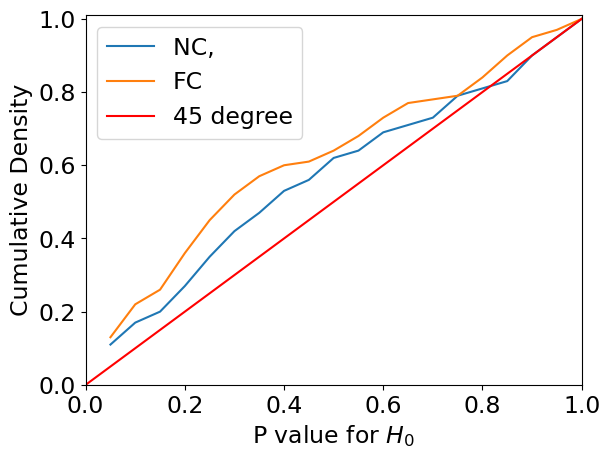

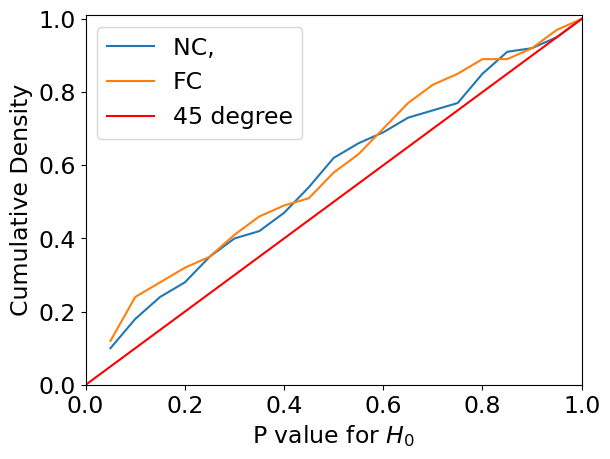

In [ ]:

fig_density(wald_NC_m_pval, wald_FC_m_pval, "man"  , model_name, f'{name_error}', model)
fig_density(wald_NC_w_pval, wald_FC_w_pval, "woman", model_name, f'{name_error}', model)
